# Auswertung 200218_13

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [33]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_13"
campaign_id    = "02_Verifikation_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

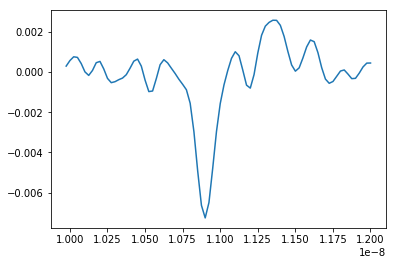

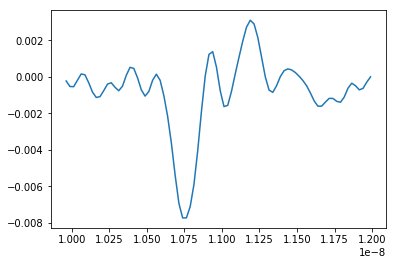

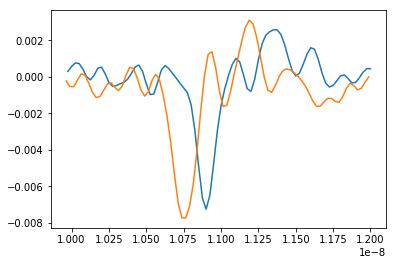

In [7]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

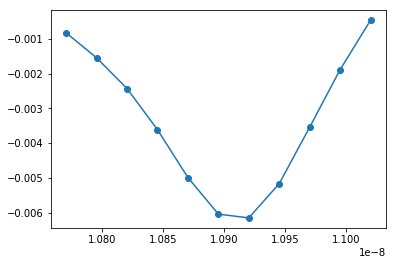

In [11]:
areaMinC1 = 32
areaMaxC1 = 43
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

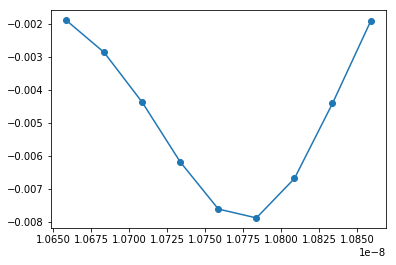

In [12]:
areaMinC3 = 27
areaMaxC3 = 36
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [13]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.09e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [14]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [15]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

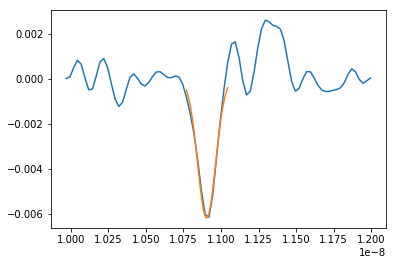

parameter: [-9.36164555e-13  1.09049588e-08  6.03381288e-11] [A, mu, sigma]


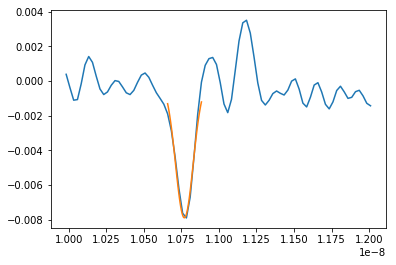

parameter: [-1.15979266e-12  1.07700259e-08  5.86979812e-11] [A, mu, sigma]


In [16]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

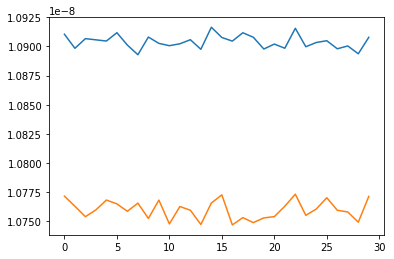

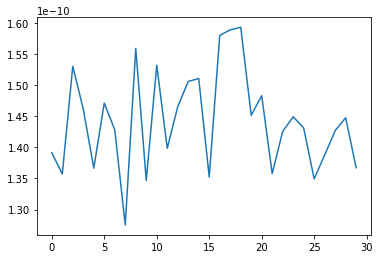

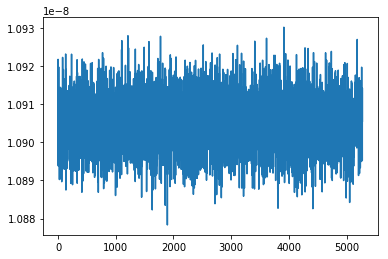

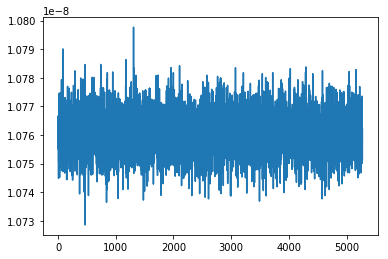

In [17]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [18]:
JitterGauss = jitter(C1, C3, axis = 1)

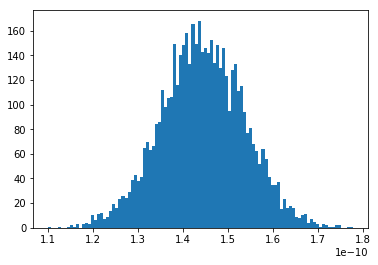

In [19]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

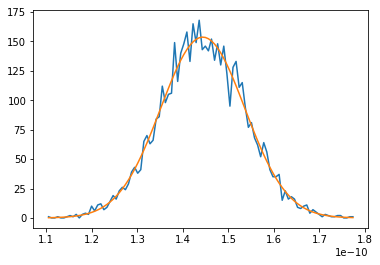

parameter: [3.55755845e-09 1.44368143e-10 9.23575058e-12] [A, mu, sigma]


In [20]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.5e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [21]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 9.235750584737179 ps
σ_1: 6.530661867815281 ps
σ_1 = σ_0 / sqrt(2)

μ: 144.36814303616927 ps

coma separated [σ_0, σ_1, μ]
9.23575058473718e-12,6.530661867815281e-12,1.4436814303616928e-10

 tab separated [σ_0, σ_1, μ]
9.23575058473718e-12	6.530661867815281e-12	1.4436814303616928e-10


## algorithm 2: min

In [22]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [23]:
factor = 0.5

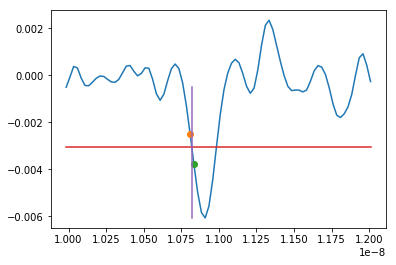

xt: 1.0819509973074718e-08 ps, yt -0.0030327948281865247 ps


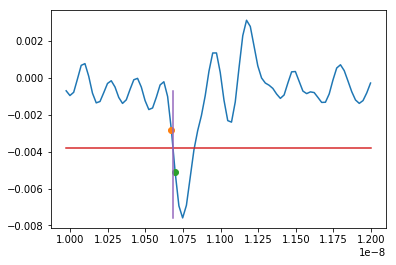

xt: 1.0683157659875758e-08 ps, yt -0.0037957323514774544 ps


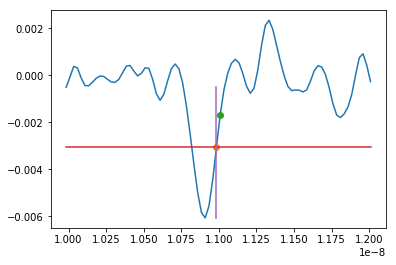

xt: 1.0984251793284622e-08 ps, yt -0.0030327948281865247 ps


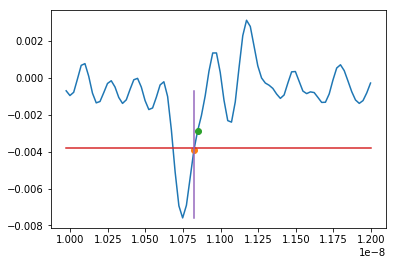

xt: 1.0825328191823981e-08 ps, yt -0.0037957323514774544 ps


In [24]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [25]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [26]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

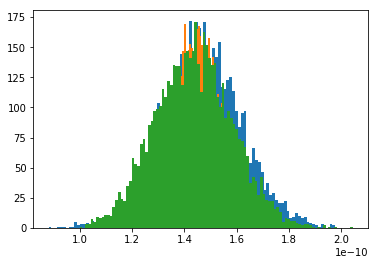

In [41]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins, range = (1.1e-10, JitterThres5c.max()))
HistThres5r = histogram(JitterThres5r, bins, range = (1e-10, JitterThres5r.max()))

### fit gauss to histogram

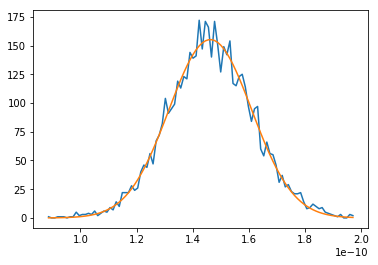

parameter: [5.73207140e-09 1.46282296e-10 1.47377144e-11] [A, mu, sigma]


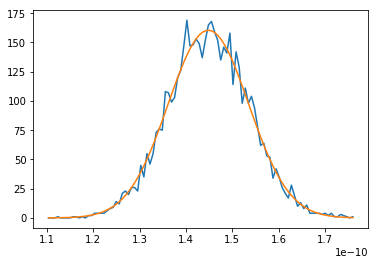

parameter: [3.49715781e-09 1.44837144e-10 8.69727448e-12] [A, mu, sigma]


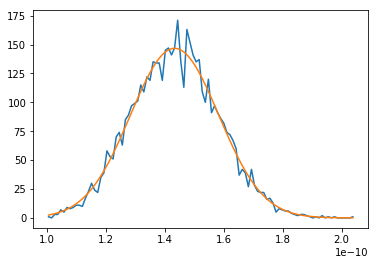

parameter: [5.51156613e-09 1.43314140e-10 1.49827720e-11] [A, mu, sigma]


In [42]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.47e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.5e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.53e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [43]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 14.737714391700093 ps
σ_1: 10.42113778556171 ps
σ_1 = σ_0 / sqrt(2)

μ: 146.28229563034571 ps

coma separated [σ_0, σ_1, μ]
1.4737714391700093e-11,1.042113778556171e-11,1.4628229563034572e-10

 tab separated [σ_0, σ_1, μ]
1.4737714391700093e-11	1.042113778556171e-11	1.4628229563034572e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 8.697274476571497 ps
σ_1: 6.1499017602243855 ps
σ_1 = σ_0 / sqrt(2)

μ: 144.8371441287326 ps

coma separated [σ_0, σ_1, μ]
8.697274476571497e-12,6.1499017602243854e-12,1.4483714412873261e-10

 tab separated [σ_0, σ_1, μ]
8.697274476571497e-12	6.1499017602243854e-12	1.4483714412873261e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 14.982772008990175 ps
σ_1: 10.594419688528943 ps
σ_1 = σ_0 / sqrt(2)

μ: 143.31414029889768 ps

coma separated [σ_0, σ_1, μ]
1.4982772008990174e-11,1.0594419688528943e-11,1.433141402988977e-10

 tab separated [σ_0, σ_1, μ]
1.4982772008990174e-11	1.059